# **Validación Cruzada (70%) y Métodos de Aprendizaje Supervisado**

En este notebook se implementa el proceso de validación cruzada utilizando el 70% de los datos para el entrenamiento y el 30% restante para la evaluación del modelo.
Este enfoque permite estimar de manera más robusta el desempeño de los algoritmos y reducir el riesgo de sobreajuste (overfitting), asegurando una mejor generalización sobre datos no vistos.

Asimismo, se aplican diferentes métodos de aprendizaje supervisado, con el objetivo de comparar su capacidad predictiva y determinar cuál ofrece el mejor rendimiento para el problema de diagnóstico de diabetes.
Los modelos implementados son los siguientes:

* Regresión Logística (Logistic Regression)
* Árbol de Decisión (Decision Tree)
* Red Neuronal (Neural Network)
* K-Vecinos Más Cercanos (K-Nearest Neighbors, KNN)

Para la evaluación del desempeño de los modelos se emplearán las siguientes métricas de evaluación:

* Precisión (Precision): mide la proporción de predicciones positivas que fueron correctas.

* Exhaustividad o Sensibilidad (Recall): indica la proporción de casos positivos correctamente identificados por el modelo.

* F1-Score: combina precisión y recall en una sola medida balanceada, útil cuando existe un desbalance en las clases.

* ROC-AUC: evalúa la capacidad del modelo para distinguir entre clases, proporcionando una métrica global del rendimiento clasificatorio.

Estas métricas permiten realizar una evaluación integral de los modelos, considerando tanto su capacidad de clasificación correcta como su habilidad para manejar posibles desequilibrios en los datos.

In [1]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargamos los datos
data = pd.read_excel("datos_numericos_diabetes_dataset.xlsx")
data.head()

,Unnamed: 0,age,physical_activity_minutes_per_week,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes,family_history_diabetes_1
0,0,0.555556,0.258103,0.640496,0.564103,0.494382,0.269231,0.516432,0.366242,0.678571,0.144275,0.720690,1,0
1,1,0.416667,0.171669,0.334711,0.333333,0.438202,0.448718,0.000000,0.000000,0.294643,0.000000,0.281034,0,0
2,2,0.583333,0.068427,0.297521,0.358974,0.280899,0.589744,0.230047,0.019108,0.517857,0.101588,0.605172,1,1
3,3,0.777778,0.058824,0.487603,0.538462,0.337079,0.384615,0.136150,0.350318,0.705357,0.108537,0.867241,1,0
4,4,0.388889,0.130852,0.256198,0.282051,0.022472,0.410256,0.352113,0.414013,0.687500,0.355394,0.551724,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          100000 non-null  int64  
 1   age                                 100000 non-null  float64
 2   physical_activity_minutes_per_week  100000 non-null  float64
 3   bmi                                 100000 non-null  float64
 4   waist_to_hip_ratio                  100000 non-null  float64
 5   systolic_bp                         100000 non-null  float64
 6   hdl_cholesterol                     100000 non-null  float64
 7   ldl_cholesterol                     100000 non-null  float64
 8   triglycerides                       100000 non-null  float64
 9   glucose_fasting                     100000 non-null  float64
 10  insulin_level                       100000 non-null  float64
 11  hba1c                      

#1. División 70% - 30%

<Axes: xlabel='diagnosed_diabetes'>

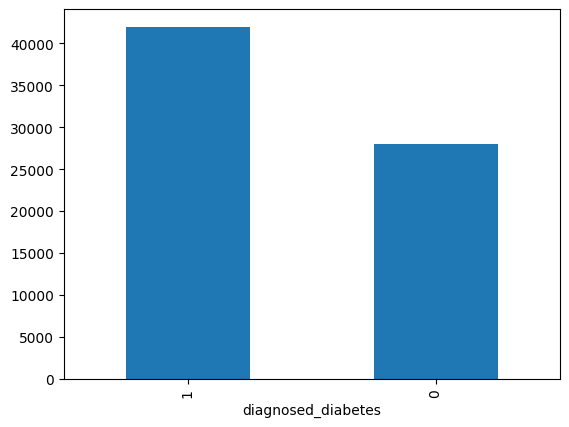

In [4]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y = data['diagnosed_diabetes'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train.value_counts().plot(kind='bar')

#2. Validación Cruzada

In [22]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring = ('f1_macro', 'roc_auc','precision_macro', 'recall_macro')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)# MUestreo Estratificado

# 3. Modelos Predictivos

3.1. KNN

In [23]:
#Método Perezoso (KNN)
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


scores = cross_validate(model_knn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.159052,0.121508,0.499387,0.749361,0.502041,0.822221,0.500882,0.756701,0.500833,0.745322
1,0.275232,0.203488,0.497943,0.750515,0.501698,0.823139,0.499185,0.757903,0.499226,0.746447
2,0.165457,0.117604,0.508115,0.748689,0.511770,0.821617,0.509417,0.756596,0.508988,0.744469
3,0.172199,0.118374,0.496916,0.750276,0.500734,0.823230,0.498120,0.757632,0.498214,0.746222
4,0.155465,0.130988,0.505054,0.750065,0.510994,0.822342,0.506157,0.757431,0.505893,0.746010
5,0.157559,0.116452,0.508306,0.750029,0.515398,0.821920,0.509443,0.757214,0.509048,0.746037
6,0.161822,0.118428,0.499313,0.750201,0.501450,0.822899,0.500564,0.757323,0.500536,0.746228
7,0.161499,0.117437,0.505137,0.751706,0.508386,0.824106,0.505995,0.758981,0.505774,0.747663
8,0.172659,0.118700,0.505821,0.750178,0.506653,0.822658,0.506820,0.757619,0.506548,0.746096
9,0.159283,0.116336,0.514265,0.750250,0.518149,0.822680,0.515728,0.757834,0.515011,0.746118


In [24]:
# Promedios para verificar overfitting comparando medida de train y test
scores.mean()

,0
fit_time,0.174023
score_time,0.127931
test_f1_macro,0.504026
train_f1_macro,0.750127
test_roc_auc,0.507727
train_roc_auc,0.822681
test_precision_macro,0.505231
train_precision_macro,0.757523
test_recall_macro,0.505007
train_recall_macro,0.746061


In [25]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_roc_auc']
print(comparacion_CV)

        Knn
0  0.502041
1  0.501698
2  0.511770
3  0.500734
4  0.510994
5  0.515398
6  0.501450
7  0.508386
8  0.506653
9  0.518149


3.2. Red Neuronal

In [13]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(20), learning_rate='constant',
                     learning_rate_init=0.1, momentum= 0.7, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,2.054616,0.020227,0.375000,0.374994,0.500000,0.500000,0.300000,0.299992,0.5,0.5
1,1.528259,0.019598,0.375000,0.374994,0.500000,0.500020,0.300000,0.299992,0.5,0.5
2,1.510845,0.020038,0.375000,0.374994,0.500000,0.500000,0.300000,0.299992,0.5,0.5
3,1.507137,0.020081,0.375000,0.374994,0.499643,0.499874,0.300000,0.299992,0.5,0.5
4,1.490375,0.019359,0.375000,0.374994,0.500000,0.500000,0.300000,0.299992,0.5,0.5
5,1.544803,0.019729,0.375000,0.374994,0.500000,0.500000,0.300000,0.299992,0.5,0.5
6,1.605487,0.029969,0.375000,0.374994,0.500000,0.500000,0.300000,0.299992,0.5,0.5
7,2.262961,0.021344,0.375000,0.374994,0.498631,0.498578,0.300000,0.299992,0.5,0.5
8,1.503982,0.020328,0.375000,0.374994,0.500000,0.499947,0.300000,0.299992,0.5,0.5
9,1.512340,0.020710,0.374944,0.375000,0.500000,0.500000,0.299929,0.300000,0.5,0.5


In [11]:
scores.mean()

,0
fit_time,2.756411
score_time,0.043794
test_f1_macro,0.374992
train_f1_macro,0.374992
test_roc_auc,0.499983
train_roc_auc,0.499996
test_precision_macro,0.299990
train_precision_macro,0.299990
test_recall_macro,0.500000
train_recall_macro,0.500000


In [14]:
#Se almacena en el df la medida a comparar
comparacion_CV['Red_Neuronal']=scores['test_roc_auc']
print(comparacion_CV)

   Red_Neuronal
0      0.500000
1      0.500000
2      0.500000
3      0.499643
4      0.500000
5      0.500000
6      0.500000
7      0.498631
8      0.500000
9      0.500000
